In [1]:
# https://mp.weixin.qq.com/s/sRxNmhwP8pdk8ZbYhr3KJw

In [1]:
from pycaret.classification import setup, get_logs, compare_models, create_model,predict_model
from pycaret.classification import tune_model, finalize_model, plot_model, interpret_model

In [2]:
import imblearn

In [3]:
!pip show imbalanced-learn

Active code page: 65001
Name: imbalanced-learn
Version: 0.12.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: d:\anaconda3\lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn, pycaret


In [4]:
!pip show scikit-learn

Active code page: 65001
Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: d:\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, category-encoders, imbalanced-learn, lightgbm, mlflow, mlxtend, pmdarima, pycaret, pyod, scikit-plot, shap, skforecast, sktime, synonyms, tbats, yellowbrick


In [6]:
import pandas as pd

file = './data/employee.csv'
raw_df = pd.read_csv(file)

<AxesSubplot:>

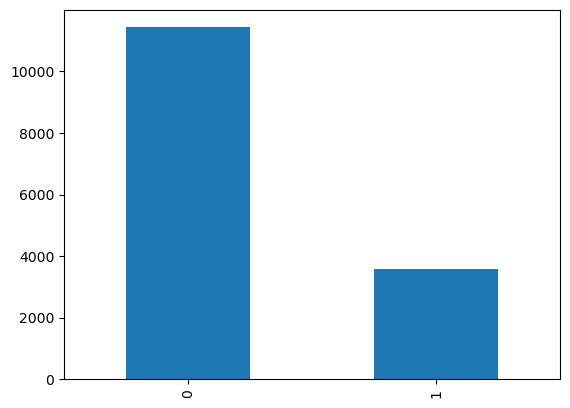

In [7]:
pred_df = raw_df[['left']]
pred_df['left'].value_counts().plot(kind='bar')

In [12]:
from sklearn.metrics import classification_report


cr = classification_report(raw_df['left'].values, pred_df['left'].values, output_dict=True)
print(cr)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11428}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3571}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14999}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 14999}}


In [20]:
classification_report(raw_df['left'].values, pred_df['left'].values)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     11428\n           1       1.00      1.00      1.00      3571\n\n    accuracy                           1.00     14999\n   macro avg       1.00      1.00      1.00     14999\nweighted avg       1.00      1.00      1.00     14999\n'

In [16]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(raw_df['left'].values, pred_df['left'].values, labels=['not left','left'])
print(mat)

ValueError: At least one label specified must be in y_true

In [14]:
print(classification_report(raw_df['left'].values, pred_df['left'].values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11428
           1       1.00      1.00      1.00      3571

    accuracy                           1.00     14999
   macro avg       1.00      1.00      1.00     14999
weighted avg       1.00      1.00      1.00     14999



In [18]:
print(pd.DataFrame(cr).T)

              precision  recall  f1-score  support
0                   1.0     1.0       1.0  11428.0
1                   1.0     1.0       1.0   3571.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0  14999.0
weighted avg        1.0     1.0       1.0  14999.0


In [6]:
raw_df = raw_df.loc[:, 'satisfaction_level':]
raw_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
exper_1 = setup(raw_df, target='left', log_experiment=True)
lightgbm_model = create_model('lightgbm')
predict_model(lightgbm_model)

,Description,Value
0,Session id,8754
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


2024/08/26 16:36:22 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:36:25
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9790,0.9958,0.9400,0.9711,0.9553,0.9416,0.9418
1,0.9867,0.9958,0.9560,0.9876,0.9715,0.9628,0.9631
2,0.9914,0.9958,0.9720,0.9918,0.9818,0.9762,0.9763
3,0.9895,0.9941,0.9600,0.9959,0.9776,0.9708,0.9710
4,0.9895,0.9923,0.9640,0.9918,0.9777,0.9708,0.9710
5,0.9876,0.9934,0.9520,0.9958,0.9734,0.9654,0.9658
6,0.9810,0.9939,0.9400,0.9792,0.9592,0.9468,0.9471
7,0.9876,0.9922,0.9600,0.9877,0.9736,0.9655,0.9657
8,0.9905,0.9943,0.9680,0.9918,0.9798,0.9735,0.9737


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/08/26 16:36:35 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9842,0.9935,0.9468,0.9864,0.9662,0.9559,0.9562


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,prediction_label,prediction_score
155,0.11,0.80,6,304,4,0,0,accounting,low,1,1,0.9999
13543,0.73,0.49,4,243,2,0,0,technical,low,0,0,0.9981
6193,0.73,0.97,3,165,2,0,0,sales,low,0,0,0.9927
12917,0.93,0.59,3,273,2,1,0,sales,medium,0,0,0.9999
3252,0.95,0.67,3,183,3,0,0,support,medium,0,0,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...
5705,0.90,0.58,5,260,2,0,0,support,medium,0,0,0.9487
12786,0.59,0.73,2,230,3,0,0,technical,low,0,0,0.9688
854,0.79,0.90,5,263,5,0,0,sales,medium,1,1,0.9854
14811,0.77,0.98,5,259,6,0,0,product_mng,low,1,1,0.9910


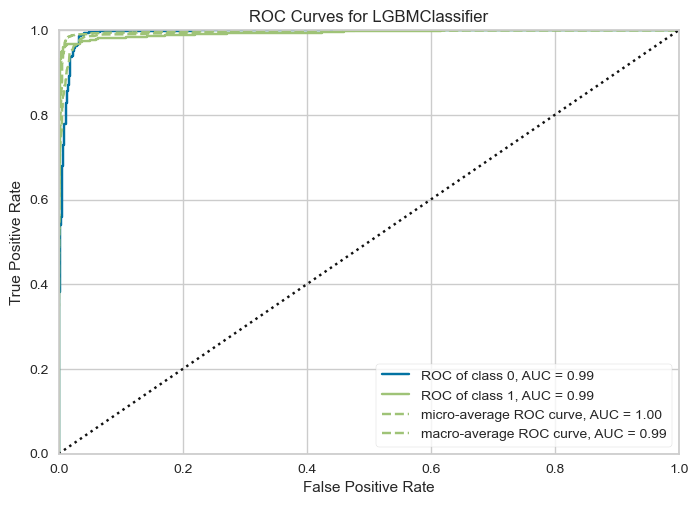

In [9]:
plot_model(lightgbm_model)

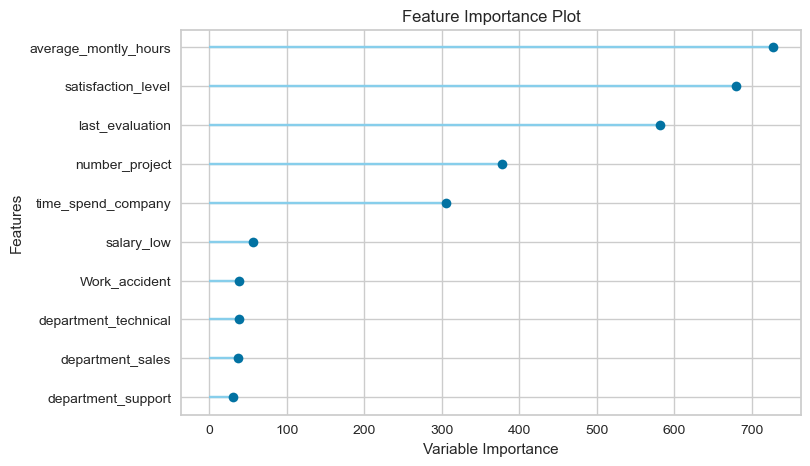

In [10]:
plot_model(lightgbm_model,'feature')

In [11]:
finalize_model(lightgbm_model)

2024/08/26 16:37:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['satisfaction_level',
                                             'last_evaluation',
                                             'number_project',
                                             'average_montly_hours',
                                             'time_spend_company',
                                             'Work_accident',
                                             'promotion_last_5years'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              miss...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=8754, reg_alpha=0.0,
                                reg_lambda=0.0, silent='warn', subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

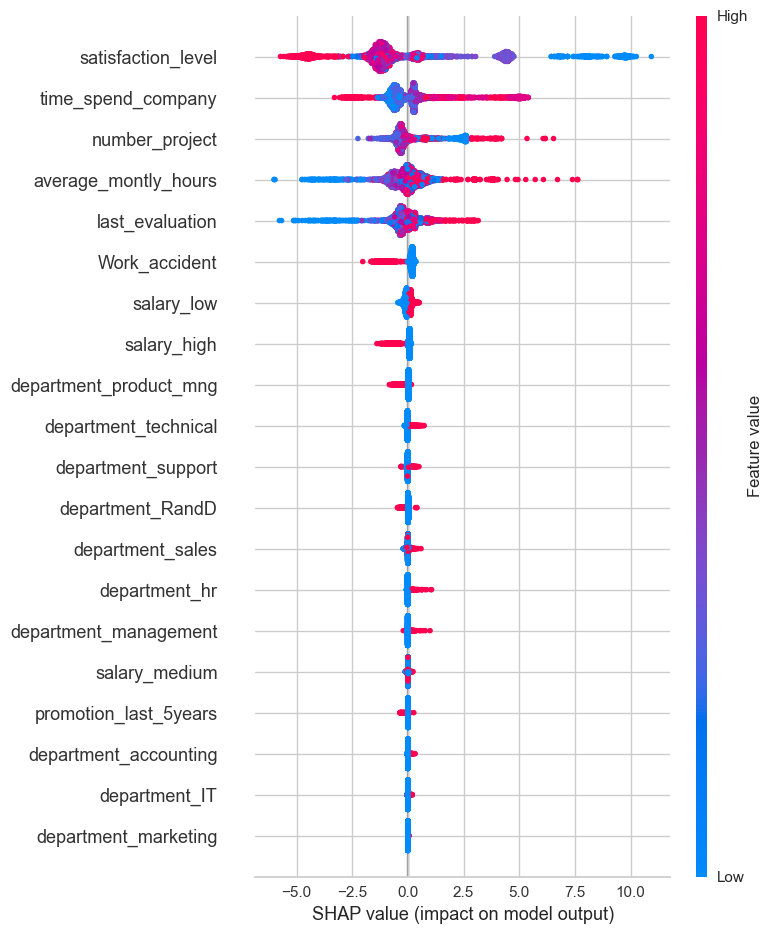

In [12]:
interpret_model(lightgbm_model)

In [13]:
logs = get_logs(save=True)
print(logs)

                             run_id       experiment_id    status  \
0  c54ddcc9cfb54269aaad7d42909f2b85  363599336677273302  FINISHED   
1  27f634a5ccc84a5f83986e86d1796cbe  363599336677273302  FINISHED   
2  c48d2291b4c949358e6212620056bab9  363599336677273302   RUNNING   

                                        artifact_uri  \
0  file:///c:/Users/DongJinhui/Desktop/ml_platfor...   
1  file:///c:/Users/DongJinhui/Desktop/ml_platfor...   
2  file:///c:/Users/DongJinhui/Desktop/ml_platfor...   

                        start_time                         end_time  \
0 2024-08-26 08:37:37.464000+00:00 2024-08-26 08:37:38.515000+00:00   
1 2024-08-26 08:36:32.464000+00:00 2024-08-26 08:36:35.729000+00:00   
2 2024-08-26 08:36:23.944000+00:00                              NaT   

   metrics.TT  metrics.MCC  metrics.Accuracy  metrics.Recall  ...  \
0        0.13          NaN               NaN             NaN  ...   
1        0.19       0.9623            0.9864          0.9552  ...   
2     

In [1]:
import mlflow

In [6]:
all_runs = mlflow.search_runs(experiment_names=['ml_'])

In [7]:
all_runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.MCC,metrics.AUC,metrics.Prec,metrics.F1,...,tags.mlflow.runName,tags.USI,tags.Run Time,tags.Run ID,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.parentRunId,tags.Source,tags.mlflow.log-model.history,tags.URI
0,2aa09a9fbf7a4645aae306a318df3df0,855435418292338528,FINISHED,file:///C:/Users/DongJinhui/Desktop/ml_platfor...,2024-08-27 02:34:06.508000+00:00,2024-08-27 02:34:08.832000+00:00,0.4837,0.8318,0.5035,0.6164,...,Logistic Regression,68fd,6.37,2aa09a9fbf7a4645aae306a318df3df0,LOCAL,DongJinhui,3c9b1f22993240d7806457ccb6d625d6,create_model,"[{""run_id"": ""2aa09a9fbf7a4645aae306a318df3df0""...",cd67c04a
1,3c9b1f22993240d7806457ccb6d625d6,855435418292338528,RUNNING,file:///C:/Users/DongJinhui/Desktop/ml_platfor...,2024-08-27 02:33:59.027000+00:00,NaT,NaN,NaN,NaN,NaN,...,Session Initialized 68fd,68fd,6.81,3c9b1f22993240d7806457ccb6d625d6,LOCAL,DongJinhui,None,setup,None,8c0e9d3c


In [11]:
import pickle
import joblib

In [10]:
pickle.load(r'C:\Users\DongJinhui\Desktop\ml_platform\mlruns\855435418292338528\2aa09a9fbf7a4645aae306a318df3df0\artifacts\model\model.pkl')

TypeError: file must have 'read' and 'readline' attributes

In [12]:
joblib.load(r'C:\Users\DongJinhui\Desktop\ml_platform\mlruns\855435418292338528\2aa09a9fbf7a4645aae306a318df3df0\artifacts\model\model.pkl')

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['satisfaction_level',
                                             'last_evaluation',
                                             'number_project',
                                             'average_montly_hours',
                                             'time_spend_company',
                                             'Work_accident',
                                             'promotion_last_5years'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['department', 'salary'],
                                    transformer...trategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['department', 'salary'],
                                    transformer=OneHotEncoder(cols=['department',
                                                                    'salary'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('balance',
                 TransformerWrapper(transformer=FixImbalancer(estimator=SMOTE()))),
                ['trained_model',
                 LogisticRegression(max_iter=1000, random_state=7329)]])